In [1]:
import pandas as pd
import numpy as py
from sklearn import preprocessing, cross_validation
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as wl
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\Aniket\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
price_data=pd.read_excel('G:\\Sanika\\Project\\Prediction\\price_cleaned.xlsx')
price_data.head()

,date,symbol,open,close,low,high,volume
0,2010-01-04,A,31.389999,31.300001,31.130000,31.630001,3815500
1,2010-01-05,A,31.209999,30.960001,30.760000,31.220001,4186000
2,2010-01-06,A,30.850001,30.850001,30.760000,31.000001,3243700
3,2010-01-07,A,30.780001,30.809999,30.500000,30.820001,3095100
4,2010-01-08,A,30.640000,30.800000,30.399999,30.850001,3733900


             date symbol       open      close        low       high    volume
536101 2010-01-04   MSFT  30.620001  30.950001  30.590000  31.100000  38409100
536102 2010-01-05   MSFT  30.850000  30.959999  30.639999  31.100000  49749600
536103 2010-01-06   MSFT  30.879999  30.770000  30.520000  31.080000  58182400
536104 2010-01-07   MSFT  30.629999  30.450001  30.190001  30.700001  50559700
536105 2010-01-08   MSFT  30.280001  30.660000  30.240000  30.879999  51197400


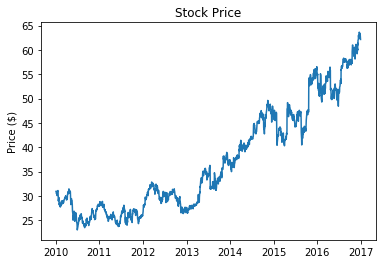

In [3]:
price_data=price_data.loc[price_data['symbol'] == 'MSFT']
print(price_data.head())
wl.plot(price_data['date'], price_data['close'])
wl.title('Stock Price')
wl.ylabel('Price ($)')
wl.show()

In [4]:
forecast_col = 'close'
price_data.fillna(value=-99999, inplace=True)

forecast_out = int(30)
price_data['label'] = price_data[forecast_col].shift(-forecast_out)

print(forecast_out)
#print(price_data.head())
print(price_data.tail())

30
             date symbol       open      close        low       high  \
537858 2016-12-23   MSFT  63.450001  63.240002  62.799999  63.540001   
537859 2016-12-27   MSFT  63.209999  63.279999  63.209999  64.070000   
537860 2016-12-28   MSFT  63.400002  62.990002  62.830002  63.400002   
537861 2016-12-29   MSFT  62.860001  62.900002  62.730000  63.200001   
537862 2016-12-30   MSFT  62.959999  62.139999  62.029999  62.990002   

          volume  label  
537858  12403800    NaN  
537859  11763200    NaN  
537860  14653300    NaN  
537861  10250600    NaN  
537862  25579900    NaN  


In [5]:
#price_data['date'] = str(price_data['date'])        
X=py.array(price_data.drop(['label','symbol','date','open','low','high','volume'],axis=1))
X = X[:-forecast_out]
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]

price_data.dropna(inplace=True)

y= py.array(price_data['label'])
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4)

print("X:",len(X))
print("Y:",len(y))



X: 1732
Y: 1732


In [6]:
clf = LinearRegression(n_jobs=-1) #use classifier as Linear Regression 
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
print(accuracy)


0.9387720673108564


7.411167796644405
Mean squared error: 7.41
Variance score: 0.94


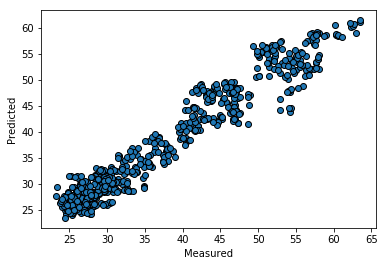

[58.71219663 58.77315199 59.01698766 58.15340817 58.07213233 57.87909432
 58.38708105 58.18388941 58.63091672 58.49883915 58.2143676  60.66286367
 62.02426812 62.01411042 61.64835895 61.10988996 60.87621708 60.92701474
 60.80509894 60.42918977 60.20567459 59.69768785 61.43500147 61.4858032
 61.18100811 59.68753015 60.01264064 59.0982635  59.86024361 60.65270596]


In [7]:
forecast= clf.predict(X_test)
#print(forecast)

MSE = py.mean((y_test-clf.predict(X_test)) ** 2)

print(MSE)

print("Mean squared error: %.2f"
      % mean_squared_error(y_test, forecast))

print('Variance score: %.2f' % r2_score(y_test, forecast))
                 
#print(forecast)
#print(y_test)


fig, ax = wl.subplots()
ax.scatter(y_test, forecast, edgecolors=(0, 0, 0))
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
wl.show()    
    
    
forecast_set = clf.predict(X_lately)
print(forecast_set)


#length_x_lately = len(X_lately)
#print(length_x_lately)
#print(len(forecast_set))
#price_data['Forecast'] = py.nan

#lastdate = len(price_data)-length_x_lately

#last_date = price_data.iloc[lastdate].date

        
#print("Last_Date:",last_date)

#for i in forecast_set:
 #   next_date = price_data.iloc[lastdate].date
  #  lastdate = lastdate+1
   # #print(next_date)
    ##print(i)
    #price_data.loc[next_date,'Forecast'] = i   
    

#print(price_data)



#wl.plot(price_data['close'], price_data['Forecast'])
#price_data['close'].plot(legend=True, figsize=(15,6))
#price_data['Forecast'].plot(legend=True, figsize=(15,6))
#price_data.set_index('date')
#wl.plot(price_data['date'],price_data['close'])
#wl.axhline(y=0,linestyle='dashed', color='black', linewidth=2)
#wl.title('Stock Price Prediction')
#wl.xlabel('Date')
#wl.ylabel('Price ($)')
#wl.show()
#wl.savefig('prediction.png')

693
693
Last_Date: 2014-02-20 00:00:00


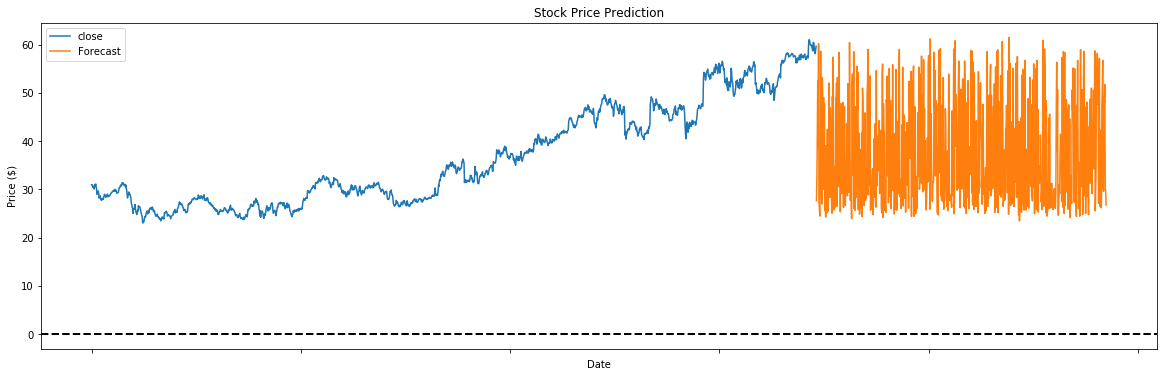

In [8]:
length_x_test = len(X_test)
print(length_x_test)
print(len(forecast))
price_data['Forecast'] = py.nan

lastdate = len(price_data)-length_x_test

last_date = price_data.iloc[lastdate].date

        
print("Last_Date:",last_date)

for i in forecast:
    next_date = price_data.iloc[lastdate].date
    lastdate = lastdate+1
    #print(next_date)
    #print(i)
    price_data.loc[next_date,'Forecast'] = i   
    

#print(price_data)



#wl.plot(price_data['close'], price_data['Forecast'])
price_data['close'].plot(legend=True, figsize=(20,6))
price_data['Forecast'].plot(legend=True, figsize=(20,6))
#price_data.set_index('date')
#wl.plot(price_data['date'],price_data['close'])
wl.axhline(y=0,linestyle='dashed', color='black', linewidth=2)
wl.title('Stock Price Prediction')
wl.xlabel('Date')
wl.ylabel('Price ($)')
wl.show()
wl.savefig('prediction1.png')

In [9]:
print(forecast)
print(y_test)


[27.64372578 32.34768398 41.0952166  52.46395774 38.6771977  60.20567459
 27.46085055 25.7540141  24.44340934 30.79324355 58.63091672 31.41298838
 29.85854795 26.93254333 53.20561837 47.71935958 30.02110371 49.06044863
 31.12851479 47.68888139 25.56098117 29.1473655  24.25037438 39.07342735
 28.65969925 25.15458975 42.43630057 31.44346657 25.4797033  36.87892465
 52.05756733 40.81074098 28.33458774 46.88626133 42.19246592 44.32601224
 27.87739866 25.03267395 49.27380204 30.39701491 57.41174754 26.26200084
 25.73369666 34.74538239 30.55957066 26.30264079 48.84709115 47.67872369
 52.03724684 26.49567677 53.18529789 48.7962935  30.54940991 50.91967806
 58.38708105 30.70180593 43.58434755 25.31714754 47.80063949 36.79764474
 29.11688833 31.49426626 31.35202794 48.0038352  26.41439889 26.26200084
 40.79042049 47.18089466 27.98915676 26.66839226 31.50442396 32.31720376
 43.59451033 32.13432853 28.64953952 51.89501157 37.44787081 47.81079719
 29.34040148 60.42918977 44.90511712 27.69452344 30

In [49]:
import csv
csvfile = "forecast.csv"

#Assuming res is a flat list
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in forecast:
        writer.writerow([val])    

PermissionError: [Errno 13] Permission denied: 'forecast.csv'

In [50]:
import csv
csvfile = "y_test.csv"

#Assuming res is a flat list
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in forecast:
        writer.writerow([val])    

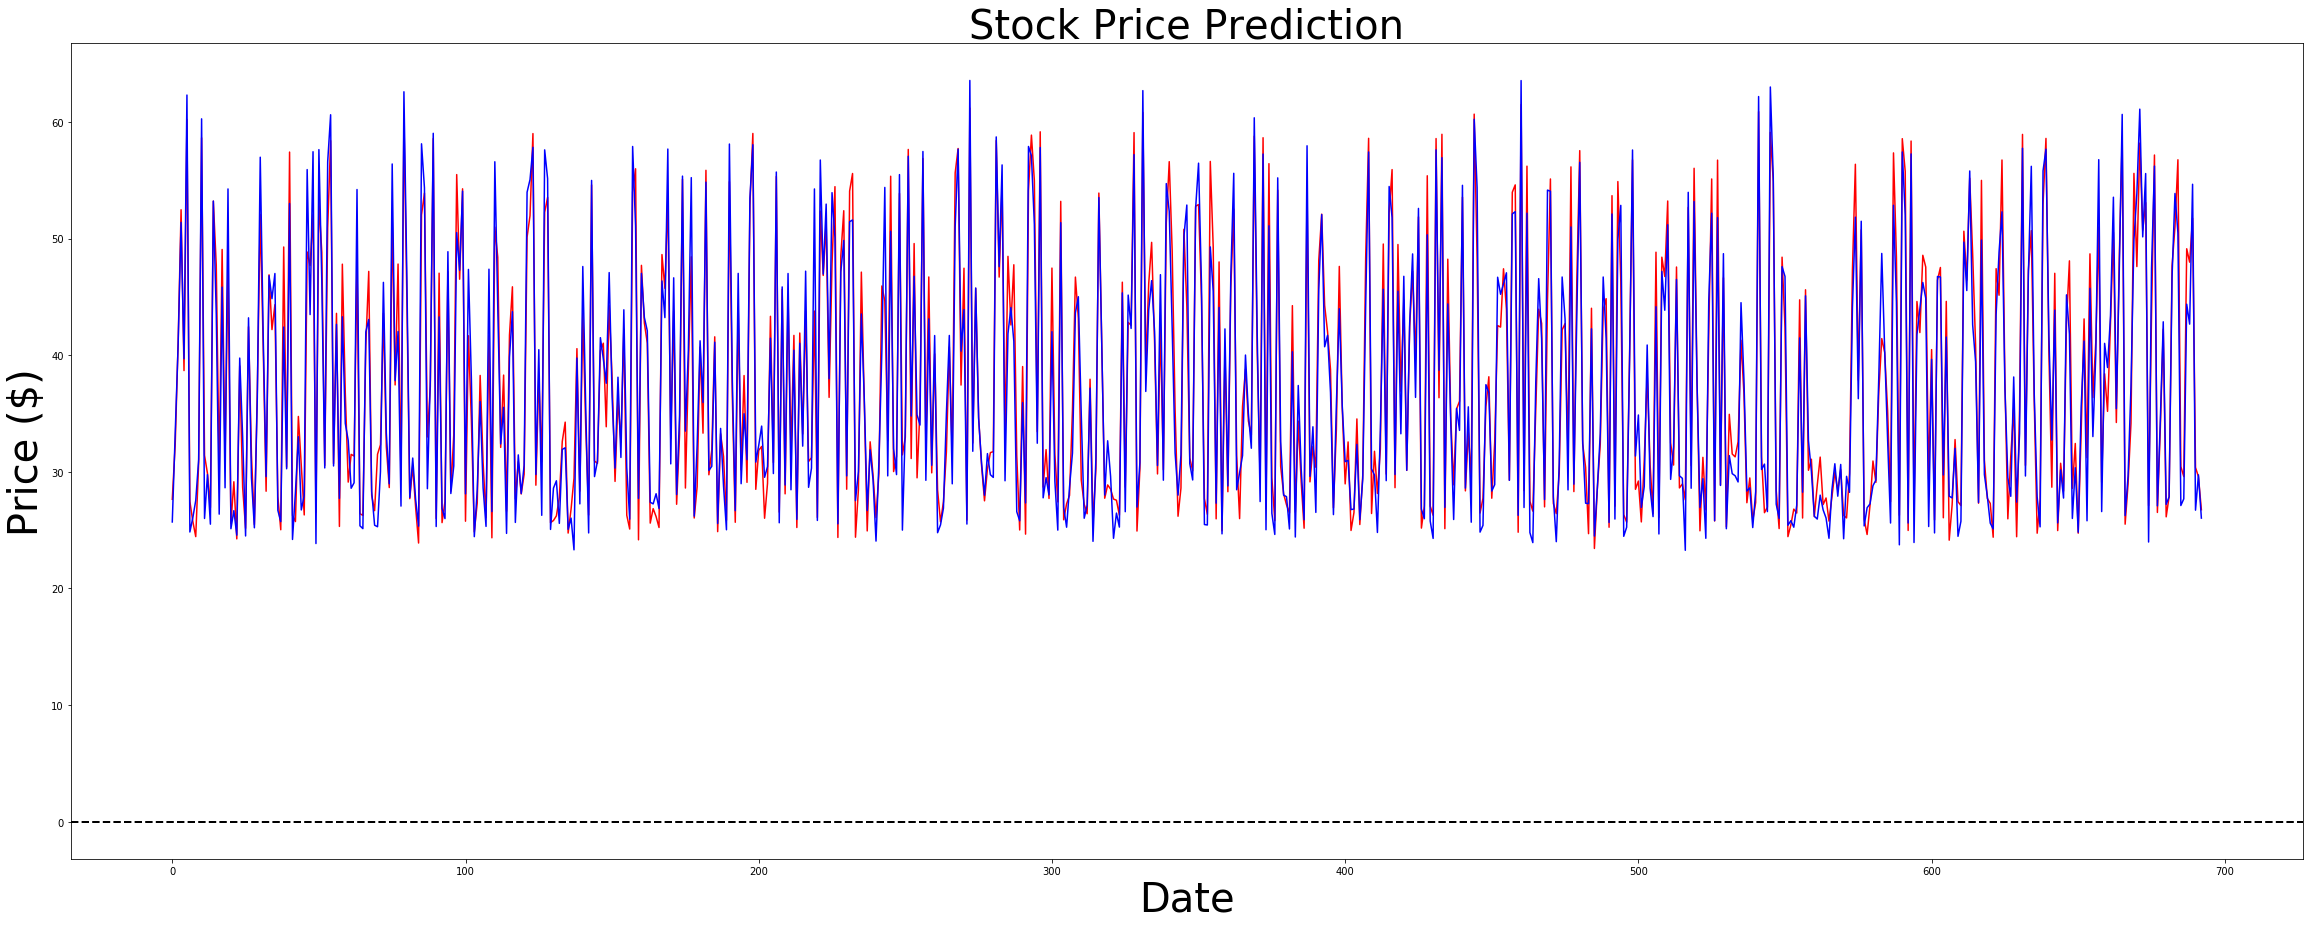

In [34]:
wl.figure(figsize=(40,15))
wl.plot(forecast,'r')
wl.plot(y_test,'b')
wl.axhline(y=0,linestyle='dashed', color='black', linewidth=2)
wl.title('Stock Price Prediction', fontsize=40)
wl.xlabel('Date',fontsize=40)
wl.ylabel('Price ($)',fontsize=4)
wl.show()

Text(0.5,0,'Date')

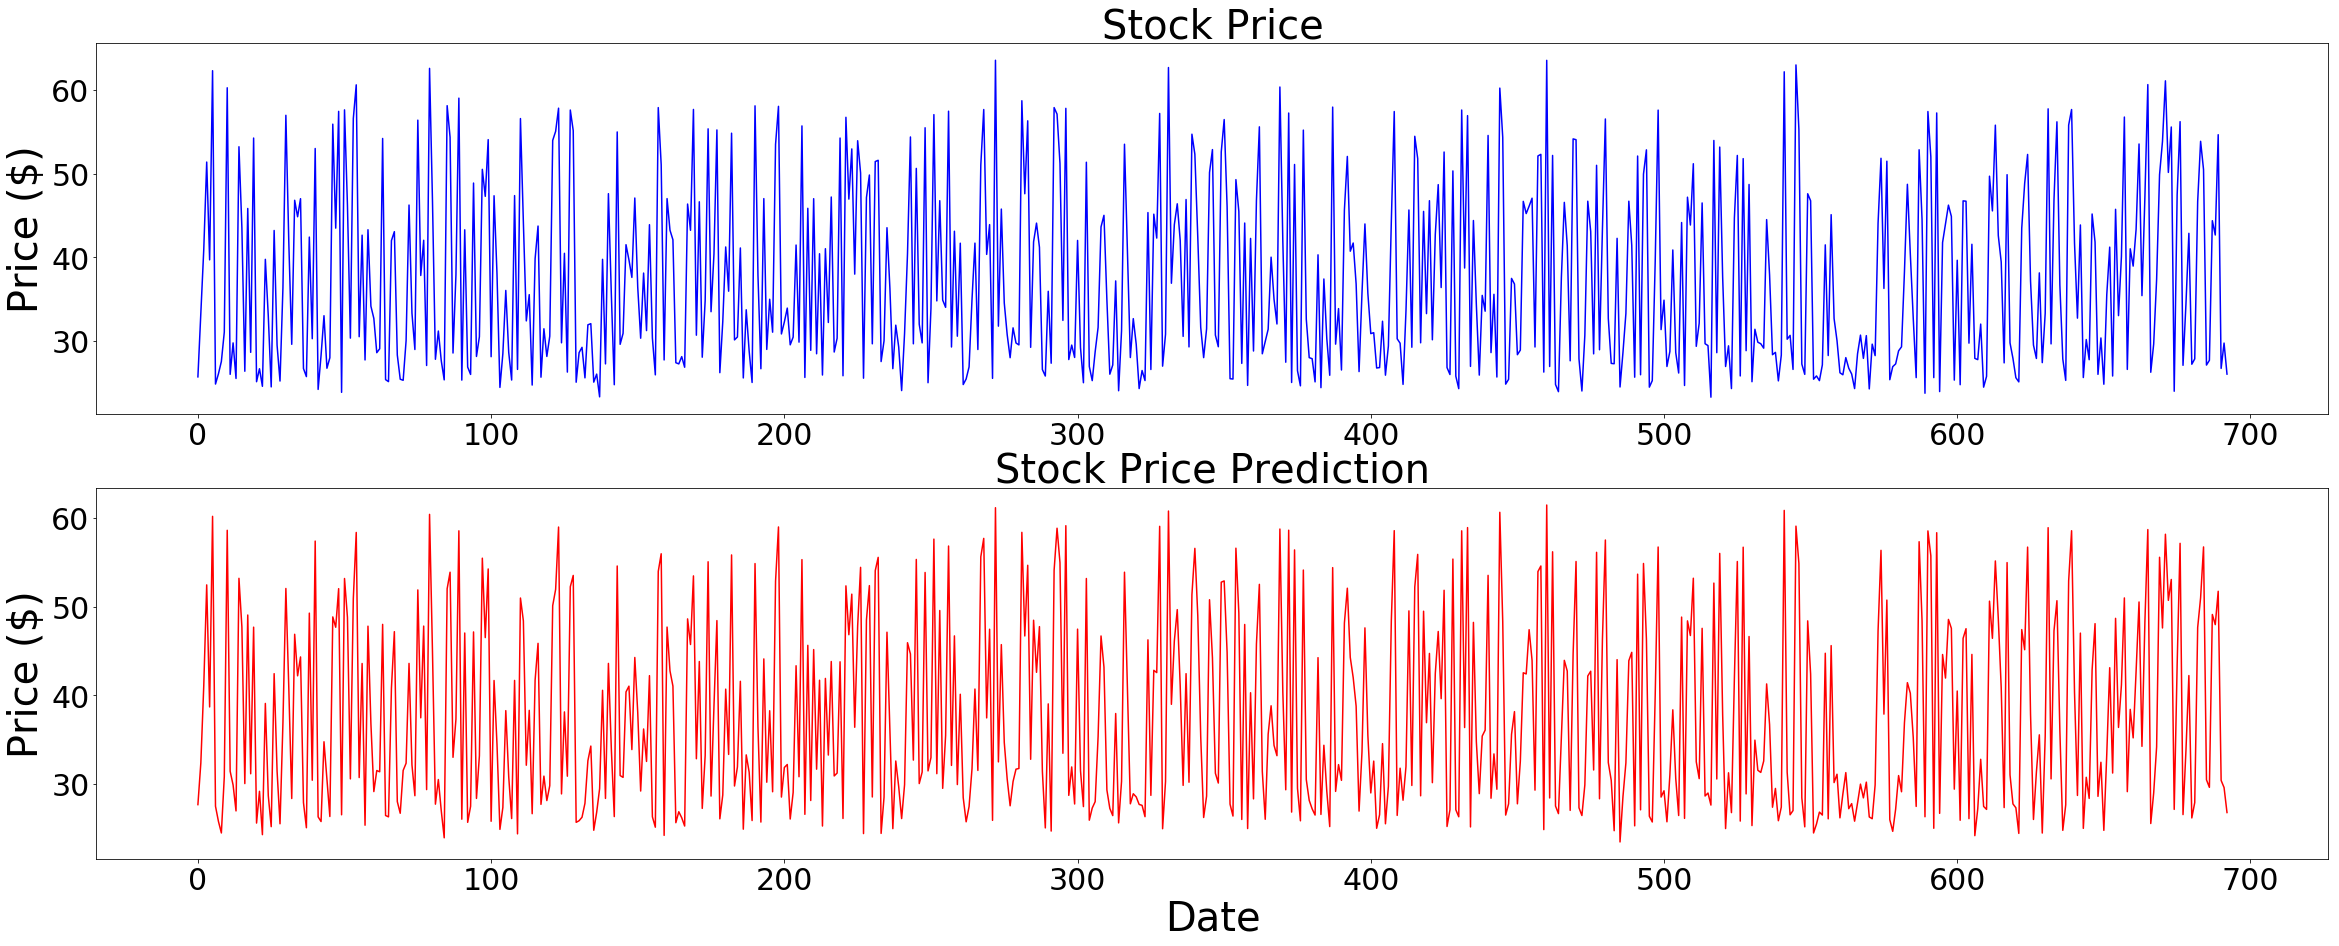

In [46]:

wl.figure(1,figsize=(40,15))                # the first figure
wl.subplot(211)             # the first subplot in the first figure
wl.plot(y_test,'b')
wl.rc('xtick', labelsize=30)
wl.rc('ytick', labelsize=30)
wl.title('Stock Price', fontsize=40)
wl.ylabel('Price ($)',fontsize=40)
wl.subplot(212)             # the second subplot in the first figure
wl.plot(forecast,'r')
wl.rc('xtick', labelsize=30)
wl.rc('ytick', labelsize=30)
wl.title('Stock Price Prediction', fontsize=40)
wl.ylabel('Price ($)',fontsize=40)
wl.xlabel('Date',fontsize=40)


In [ ]:
price_data.to_csv("prices_microsoft1.csv")

In [47]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_train, X_train))

Mean squared error: 1477.34


In [48]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, X_test))

Mean squared error: 1499.79


In [52]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, forecast))

Mean squared error: 7.41


In [53]:
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.9387720673108564


In [54]:
accuracy = clf.score(X_train,y_train)
print(accuracy)

0.9354918033490438


In [51]:
print('Variance score: %.2f' % r2_score(y_test, forecast))

Variance score: 0.94
